In [0]:
 !pip install tensorflow-gpu==2.0.0rc0

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import cv2

In [0]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [0]:
Test_data_dir = '/content/dog-cat-full-dataset/data/test'

In [0]:
Train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_size = (32,32)
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=(1.0/255.0))

In [0]:
train_gen = datagen.flow_from_directory(Train_data_dir,img_size,classes=['cats','dogs'],class_mode='binary',batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [0]:
test_gen = datagen.flow_from_directory(Test_data_dir,img_size,classes=['cats','dogs'],class_mode='binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


<h1>Build Base CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_size[0], img_size[1], 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss = 'binary_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [16]:
history = model.fit_generator(train_gen,len(train_gen),25,validation_data=test_gen,validation_steps=len(test_gen),verbose = 1)

1000/1000 [==============================] - 145s 145ms/step - loss: 0.3632 - accuracy: 0.8361 - val_loss: 0.3998 - val_accuracy: 0.8198


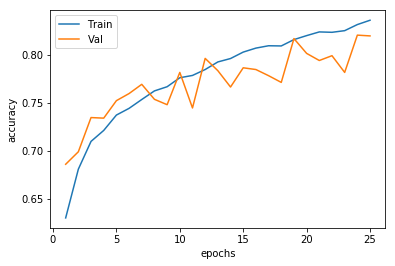

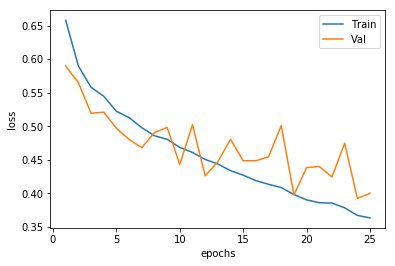

In [17]:
epoch_Range = range(1,26)
plt.plot(epoch_Range,history.history['accuracy'])
plt.plot(epoch_Range,history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()
plt.plot(epoch_Range,history.history['loss'])
plt.plot(epoch_Range,history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()